In [15]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [17]:
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"


--2025-01-17 11:33:56--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0.006s  

2025-01-17 11:33:57 (1.43 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [18]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

--2025-01-17 11:34:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  2.86MB/s    in 2m 25s  

2025-01-17 11:36:52 (1.63 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [21]:
cfg_file = 'yolov3.cfg'

weight_file = 'yolov3.weights'

namesfile = 'coco.names'

m = Darknet(cfg_file)

m.load_weights(weight_file)

class_names = load_class_names(namesfile)

In [22]:
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256
   13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128
   14 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256
   15 shortcut 12
   16 conv    128  1 x 1

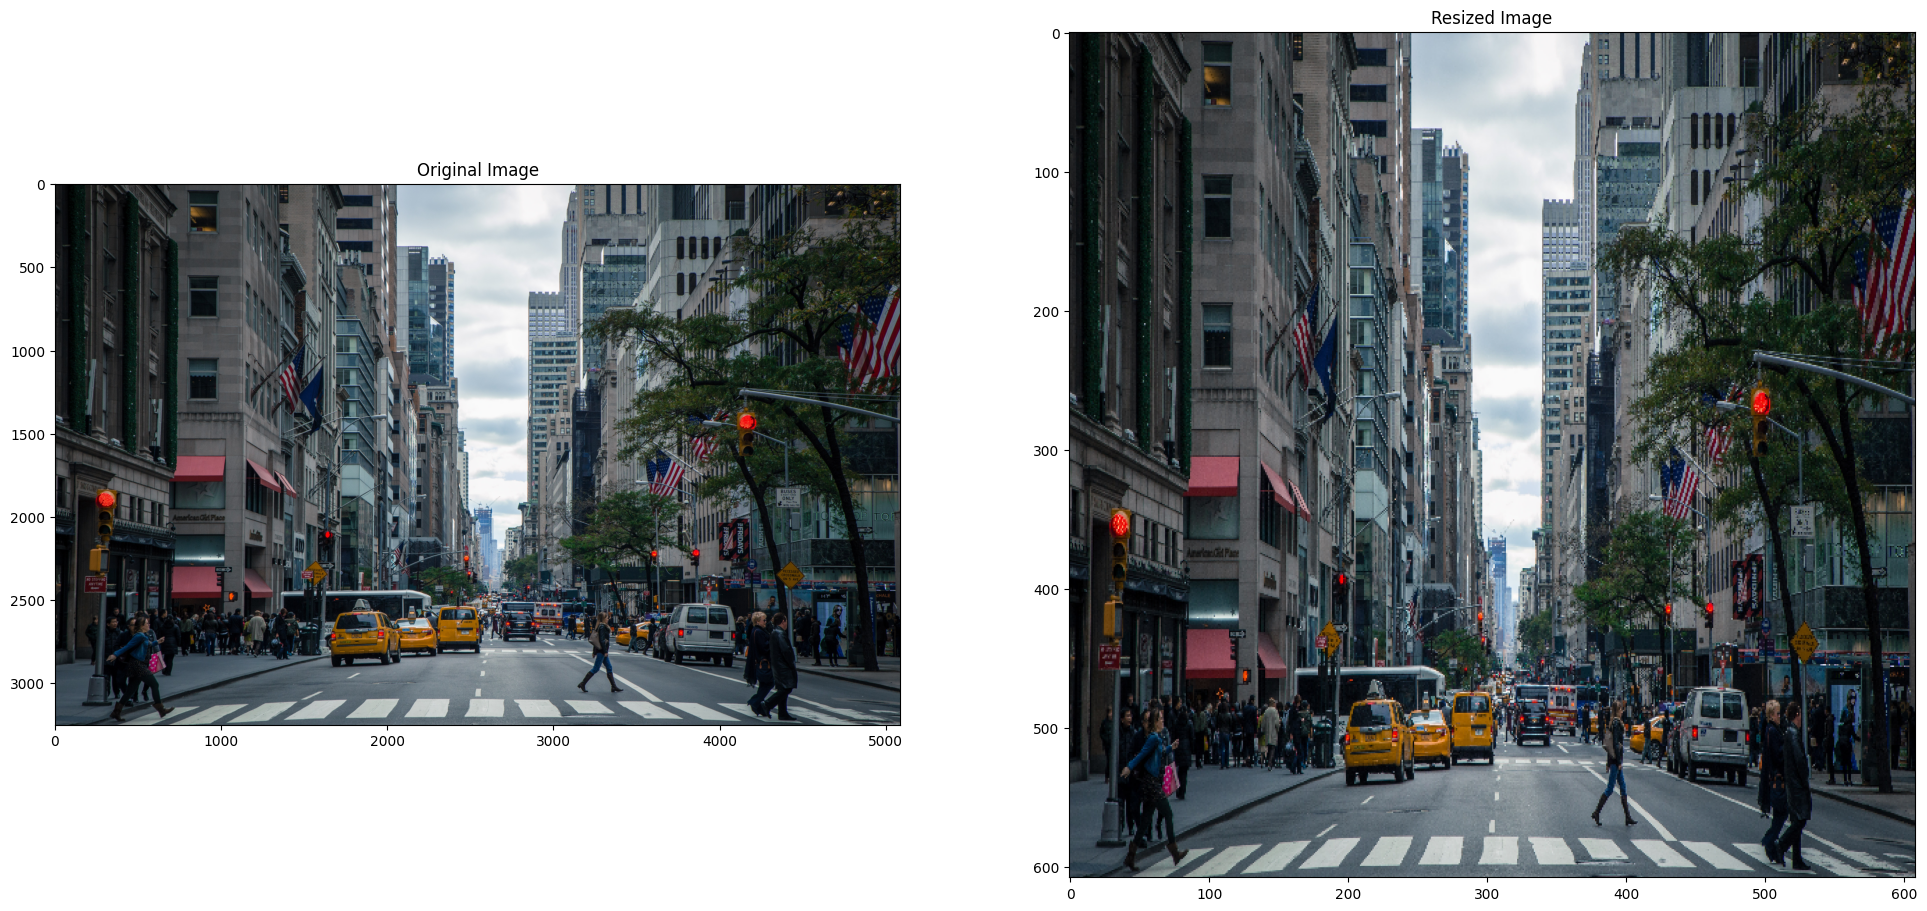

In [27]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]

img = cv2.imread('city_scene.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)

In [28]:
nms_thresh = 0.6 
iou_thresh = 0.4




It took 1.008 seconds to detect the objects in the image.

Number of Objects Detected: 33 

Objects Found and Confidence Level:

1. car: 0.963287
2. car: 0.999734
3. car: 0.970851
4. person: 1.000000
5. person: 1.000000
6. truck: 0.761098
7. car: 0.991036
8. person: 1.000000
9. person: 1.000000
10. traffic light: 1.000000
11. traffic light: 1.000000
12. person: 1.000000
13. person: 0.999997
14. person: 0.999999
15. person: 0.999998
16. traffic light: 1.000000
17. person: 0.999999
18. person: 1.000000
19. bus: 0.998977
20. person: 1.000000
21. traffic light: 1.000000
22. traffic light: 1.000000
23. traffic light: 1.000000
24. traffic light: 1.000000
25. person: 0.999999
26. person: 1.000000
27. person: 1.000000
28. handbag: 0.997140
29. person: 0.999576
30. person: 0.999997
31. traffic light: 1.000000
32. truck: 0.726746
33. person: 1.000000


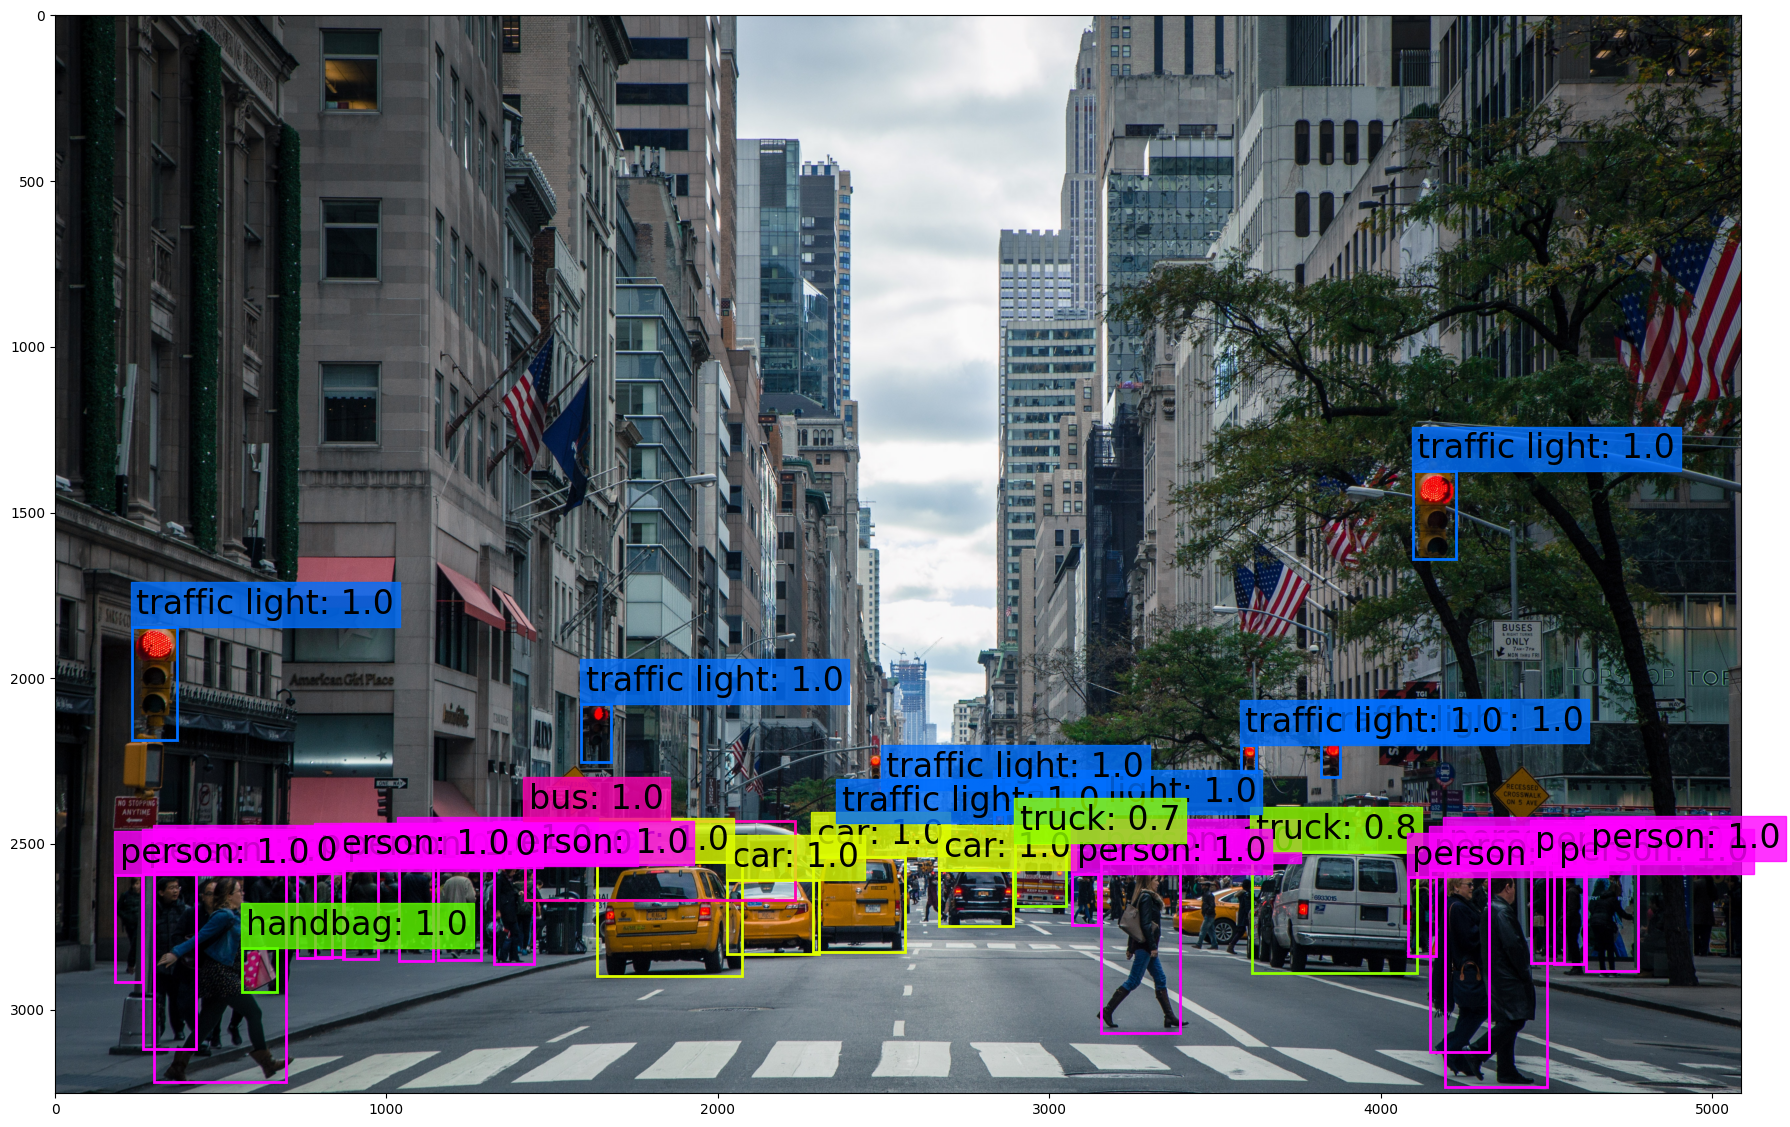

In [30]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]

img = cv2.imread('city_scene.jpg')

original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized_image = cv2.resize(original_image, (m.width, m.height))

iou_thresh = 0.4

nms_thresh = 0.6

boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)